In [1]:
%load_ext autoreload
%autoreload 2
import sys
import pickle
from pathlib import Path
gpu_implementation_path = '/home/mt/repos/research.mtne/gpu_implementation'
if gpu_implementation_path not in sys.path:
    sys.path.append(gpu_implementation_path)
gpu_implementation_analysis_path = '/home/mt/repos/research.mtne/gpu_implementation/analysis'
if gpu_implementation_analysis_path not in sys.path:
    sys.path.append(gpu_implementation_analysis_path)
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import utils
from metrics import *
# from esmt import TrainingState

main_log_dir = Path(gpu_implementation_path) / "logs"

In [32]:
experiments = {
    'ST-zaxxon': {'dir': main_log_dir / 'ST-zaxxon-5000'},
    'ST-riverraid': {'dir': main_log_dir / 'ST-riverraid-5000'},
    'MT': {'dir': main_log_dir / 'MT-zaxxon-riverraid-5000' }
#    "MT-zaxxon-riverraid-50000"
}

In [ ]:
for exp_name, exp in experiments.items():
    exp['cfg'] = utils.get_config(exp)
    exp['rewards'] = utils.get_rewards(exp)
    exp['plot_rewards'] = utils.plot_rewards(exp)

In [46]:
experiments.keys()

dict_keys(['ST-riverraid', 'ST-zaxxon', 'MT'])

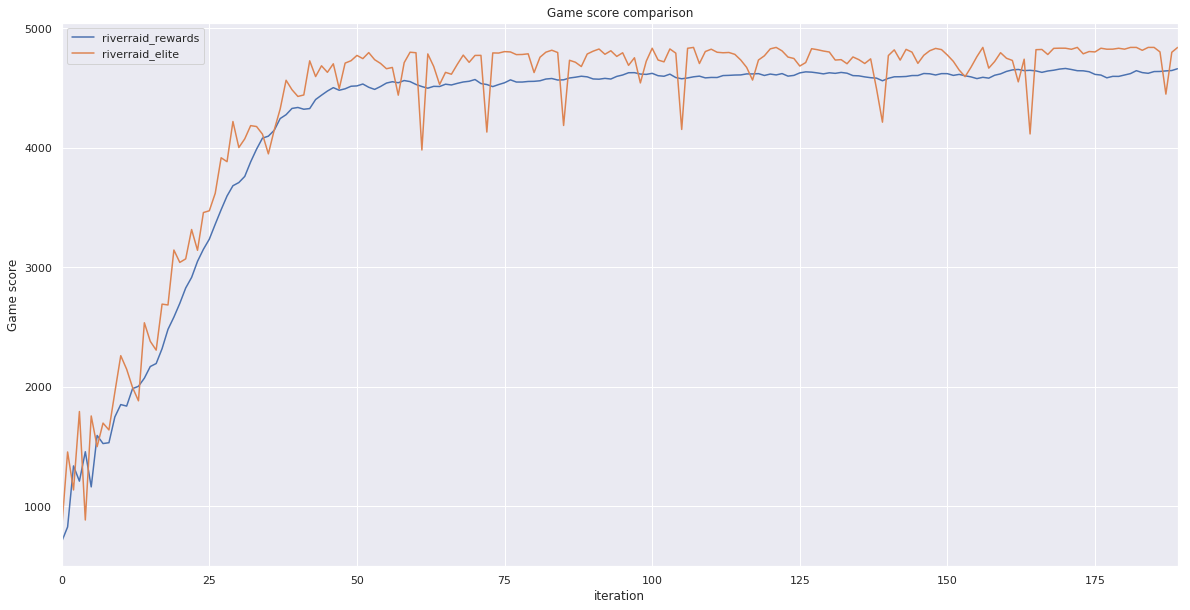

In [47]:
experiments['ST-riverraid']['plot_rewards']

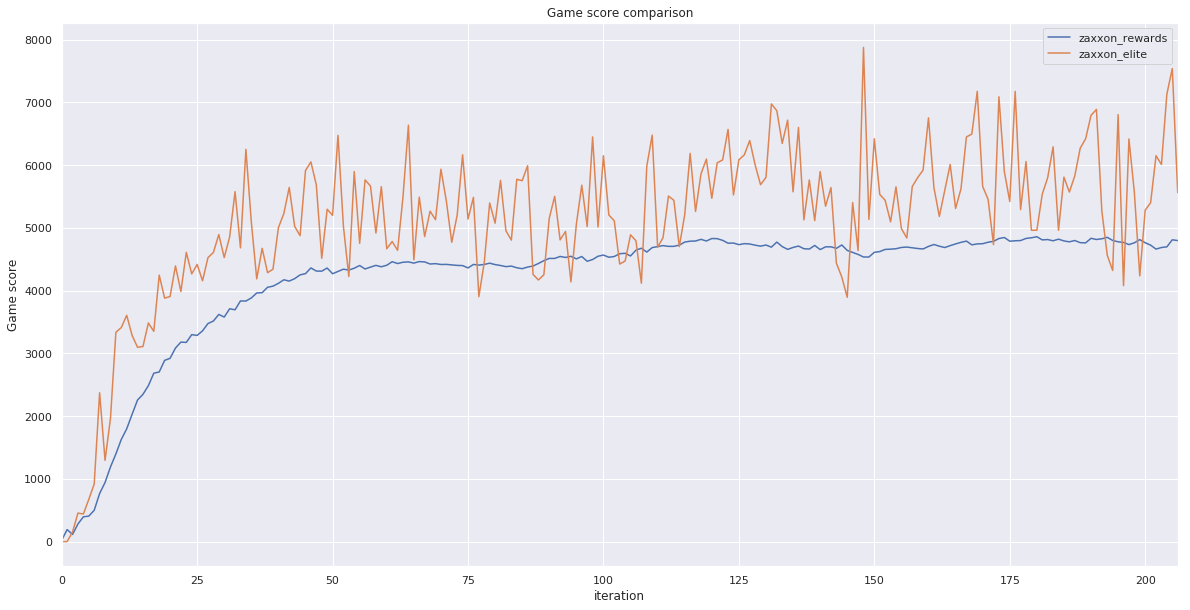

In [48]:
experiments['ST-zaxxon']['plot_rewards']

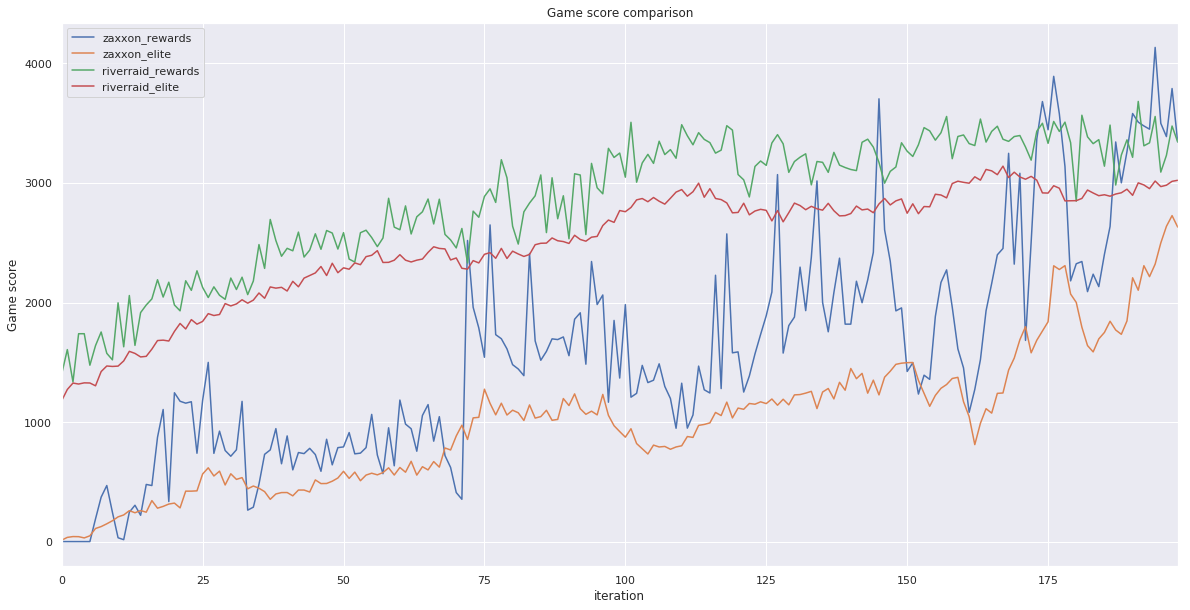

In [45]:
experiments['MT']['plot_rewards']

In [ ]:
exp

In [3]:
logdir = main_log_dir / log_session
iterlogfiles = {}
cfg = utils.get_config(logdir)
rewards = utils.get_rewards(cfg)
rewards.tail()

,zaxxon_rewards,zaxxon_elite,riverraid_rewards,riverraid_elite,iteration
0,4134.0,2321.199951,3556.300049,3016.040039,194
0,3499.0,2498.000000,3090.800049,2969.639893,195
0,3388.0,2637.199951,3231.100098,2981.280029,196
0,3790.0,2726.800049,3476.399902,3013.800049,197
0,3344.0,2631.199951,3343.300049,3022.360107,198


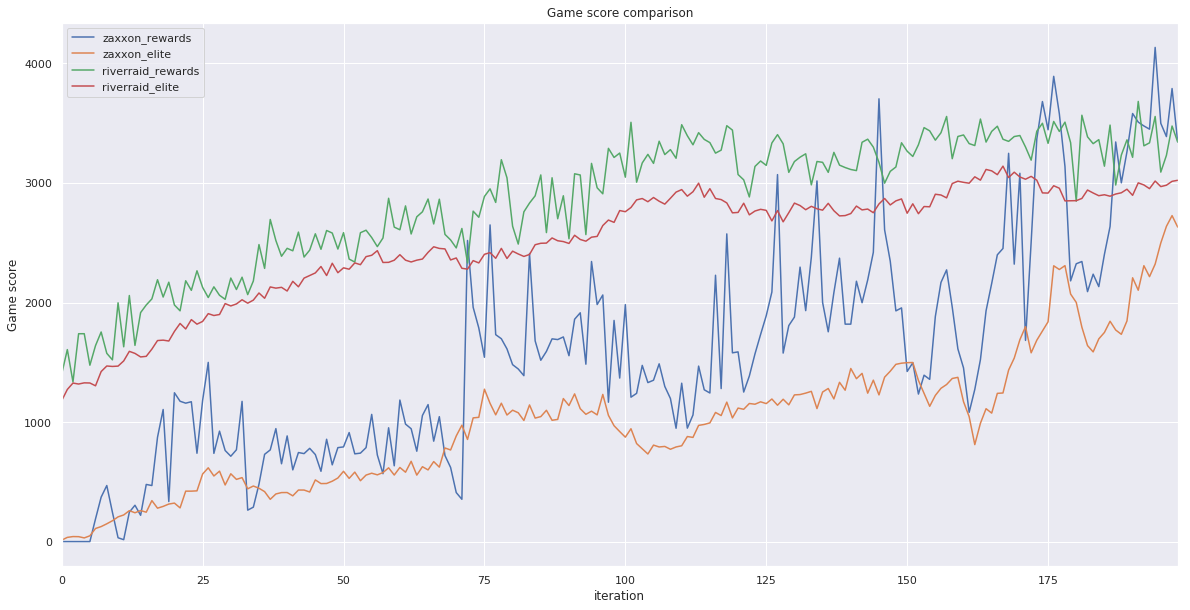

In [4]:
utils.plot_rewards(rewards, cfg);

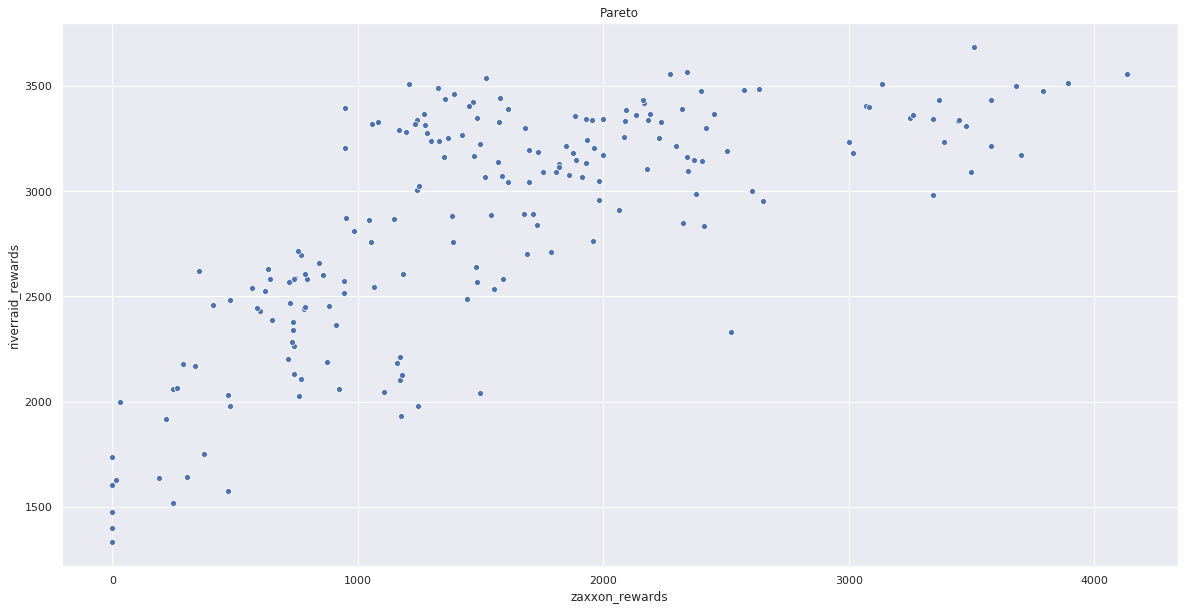

In [5]:
utils.plot_pareto(rewards, cfg);

In [6]:
utils.compute_hv_value(rewards, cfg)

12920489.242675781

In [86]:
eplens_df = pd.DataFrame(columns=[
    'game0_episode_lengths',
    'game1_episode_lengths', 
    'iteration'
])

for i in range(last_iteration):
#     print("Loading iteration {}".format(i))
    df = {
        'game0_episode_lengths': np.array([l for l in get_iter_log(i, 'game0_episode_lengths')]).flatten(),
        'game1_episode_lengths': np.array([l for l in get_iter_log(i, 'game1_episode_lengths')]).flatten(),
    }
    df['iteration'] = [i] * df['game0_episode_lengths'].shape[0]
    edf = pd.DataFrame.from_dict(df)
    eplens_df = pd.concat([eplens_df, edf], sort=True)
print("Last iteration: {}".format(max(iterations)))
m = pd.melt(eplens_df, id_vars=['iteration'], value_vars=['game0_episode_lengths', 'game1_episode_lengths'])
m['value'] = m['value'].astype('float32')
m['variable'] = m['variable'].astype('category')
m = m.query('iteration >= 0')
sns.set(rc={'figure.figsize':(20, 20)})
sns.boxplot(x='iteration', y='value', hue='variable', data=m)

NameError: name 'get_iter_log' is not defined

In [8]:
reward_eplen = pd.DataFrame(columns=['eplen', 'reward', 'iteration'])
for i in range(last_iteration):
    df = {
        'eplen': np.array(get_iter_log(i, 'game0_episode_lengths')).flatten(),
        'reward': np.array(get_iter_log(i, 'game0_rewards')).flatten()
    }
    edf0 = pd.DataFrame.from_dict(df)
    edf0['game'] = [0] * edf0['eplen'].shape[0]
    edf0['iteration'] = [i] * edf0['eplen'].shape[0]

    df = {
        'eplen': np.array(get_iter_log(i, 'game1_episode_lengths')).flatten(),
        'reward': np.array(get_iter_log(i, 'game1_rewards')).flatten()
    }
    edf1 = pd.DataFrame.from_dict(df)
    edf1['game'] = [1] * edf1['eplen'].shape[0]
    edf1['iteration'] = [float(i)] * edf1['eplen'].shape[0]

    reward_eplen = pd.concat([reward_eplen, edf0, edf1], sort=True)

In [9]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.scatterplot(x='eplen', y='reward', hue='iteration', data=reward_eplen.query('game == 0')).set(title='Game 0 episode length vs reward')

AttributeError: 'int' object has no attribute 'view'

[Text(0.5, 1.0, 'Game 1 episode length vs reward')]

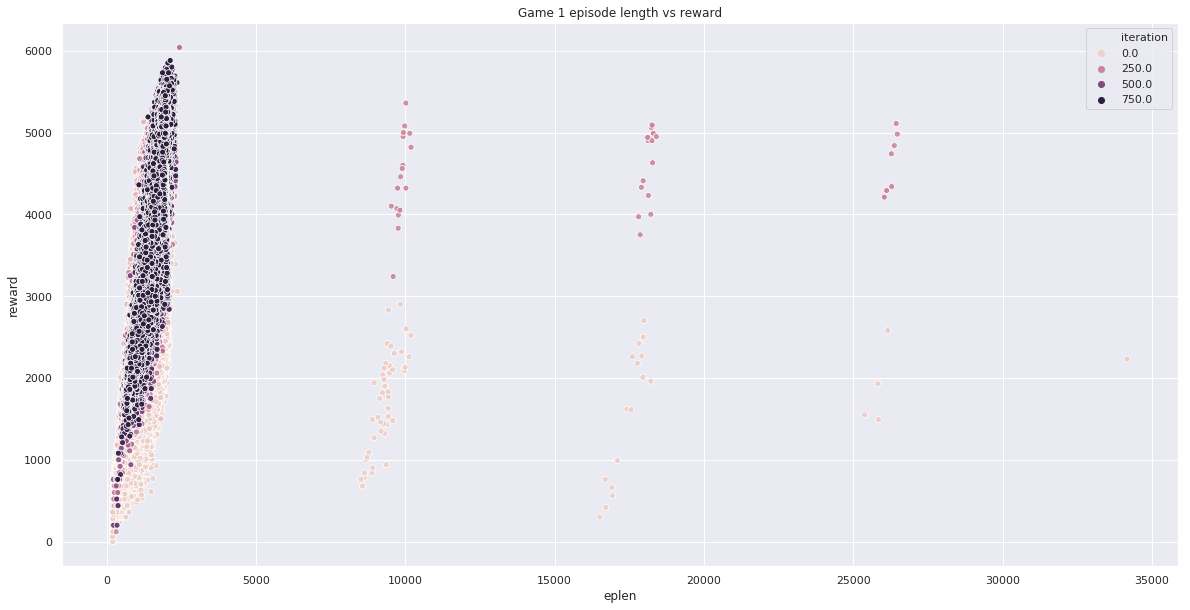

In [108]:
sns.set(rc={'figure.figsize':(20, 10)})
sns.scatterplot(x='eplen', y='reward', hue='iteration', data=reward_eplen.query('game == 1')).set(title='Game 1 episode length vs reward')

In [109]:
# thetas = pd.DataFrame(columns=['iteration', 'theta'])
# for iteration in iterations:
#     print("Loading iteration {}".format(iteration))
#     thetas = pd.concat(
#         [thetas,
#          pd.DataFrame.from_dict({
#              'iteration': [iteration] * 1008450,
#              'theta': np.array(get_iter_log(iteration, 'state').theta)
#          })
#         ]
#     )

In [63]:
# %time
# theta_deltas = []
# for ti in iterations[1:]:
#     print("Calculating {}".format(ti))
#     tc = thetas[thetas['iteration'] == ti]['theta'].values
#     tp = thetas[thetas['iteration'] == ti-1]['theta'].values
#     td = np.linalg.norm(tc - tp)
#     theta_deltas.append(td)

In [64]:
# pd.DataFrame(theta_deltas).plot()

In [65]:
# %time
# theta_deltas_from0 = []
# t0 = thetas[thetas['iteration'] == 0]['theta'].values
# for ti in iterations[1:-1]:
#     print("Calculating {}".format(ti))
#     tc = thetas[thetas['iteration'] == ti]['theta'].values
#     td = np.linalg.norm(tc - t0)
#     theta_deltas_from0.append(td)

In [66]:
# pd.DataFrame(theta_deltas).plot()

In [67]:
# sns.set(rc={'figure.figsize':(20, 10)})
# pd.DataFrame(theta_deltas_from0).plot()

In [68]:
# ms = pd.DataFrame(columns=['iteration', 'game0_mean', 'game0_std', 'game1_mean', 'game1_std'])
# for iteration in iterations:
#     game0_rewards = np.array(get_iter_log(iteration, 'game0_rewards'))
#     game1_rewards = np.array(get_iter_log(iteration, 'game1_rewards'))
    
#     game0_centered_ranks = compute_centered_ranks(game0_rewards)
#     game1_centered_ranks = compute_centered_ranks(game1_rewards)
    
#     game0_centered = np.abs(game0_centered_ranks[:, 0] - game0_centered_ranks[:, 1])
#     game1_centered = np.abs(game1_centered_ranks[:, 0] - game1_centered_ranks[:, 1])
    
#     game0_centered_top = np.sort(game0_centered)[-10:]
#     game1_centered_top = np.sort(game1_centered)[-10:]
    
    
#     m0, s0 = game0_centered_top.mean(), game0_centered_top.std()
#     m1, s1 = game1_centered_top.mean(), game1_centered_top.std()
#     d = {'iteration': iteration, 'game0_mean': [m0], 'game0_std': [s0], 'game1_mean': [m1], 'game1_std': [s1]}
#     ms = pd.concat([ms, pd.DataFrame.from_dict(d)], sort=True)
# sns.set(rc={'figure.figsize':(20, 10)})
# ms.set_index('iteration').plot()